In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../ThucHanh2/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
df.head(20)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,01/06/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,01/07/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,01/08/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,01/09/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,01/10/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [3]:
# Xem thông tin về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
 4   4       365 non-null    float64
 5   5       365 non-null    float64
 6   6       365 non-null    float64
 7   7       365 non-null    float64
 8   8       365 non-null    float64
 9   9       365 non-null    float64
 10  10      365 non-null    float64
 11  11      365 non-null    float64
 12  12      365 non-null    float64
 13  13      365 non-null    float64
 14  14      365 non-null    float64
 15  15      365 non-null    float64
 16  16      365 non-null    float64
 17  17      365 non-null    float64
 18  18      365 non-null    float64
 19  19      365 non-null    float64
 20  20      365 non-null    float64
 21  21      365 non-null    float64
 22  22

In [4]:
# Thống kê mô tả
print(df.describe())

                 1            2            3            4            5  \
count   365.000000   365.000000   365.000000   365.000000   365.000000   
mean   1040.229041  1040.230685  1040.229041  1040.228219  1040.228767   
std     105.146791   105.145625   105.146791   105.147113   105.146720   
min     885.700000   885.700000   885.700000   885.700000   885.700000   
25%     988.400000   988.400000   988.400000   988.400000   988.400000   
50%    1022.600000  1022.600000  1022.600000  1022.600000  1022.600000   
75%    1061.500000  1061.500000  1061.500000  1061.500000  1061.500000   
max    1565.500000  1565.500000  1565.500000  1565.500000  1565.500000   

                 6            7            8            9           10  ...  \
count   365.000000   365.000000   365.000000   365.000000   365.000000  ...   
mean   1040.228767  1040.228493  1040.228219  1040.278082  1040.277808  ...   
std     105.146665   105.146912   105.147104   105.152979   105.153179  ...   
min     885.70000

In [5]:
# Chọn cột 10,11,12
X = df.iloc[:, [10, 11, 12]].values
print(X)

[[ 964.4  964.4  964.4]
 [1019.7 1019.7 1019.7]
 [ 988.4  988.4  988.4]
 ...
 [1061.5 1061.5 1061.5]
 [1022.6 1022.6 1022.6]
 [1022.6 1022.6 1022.6]]


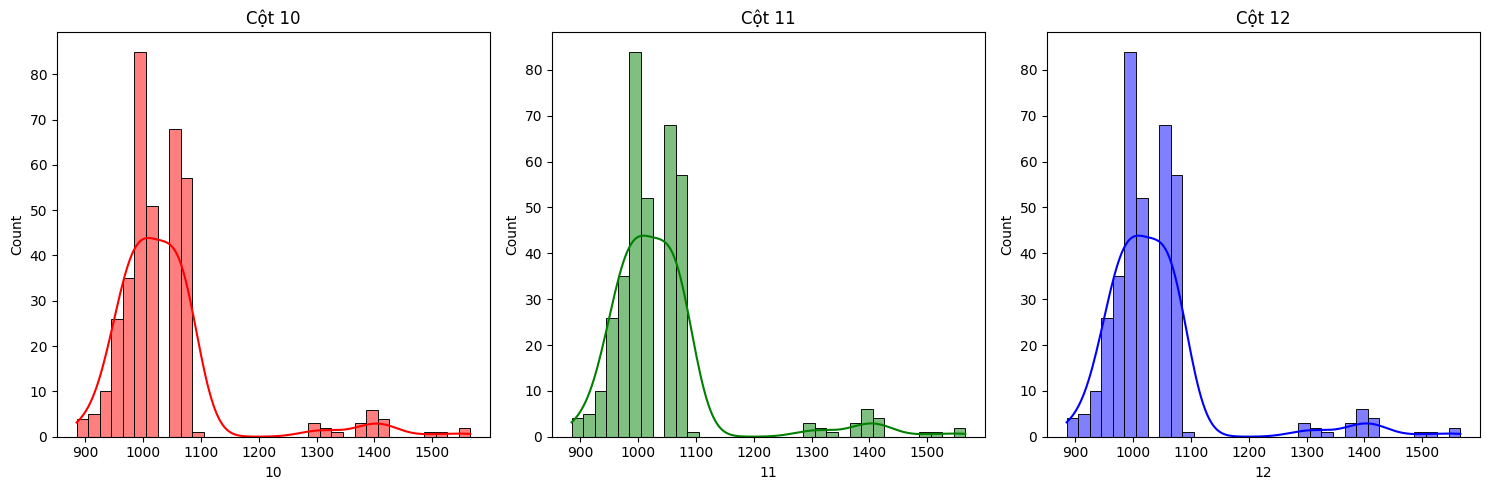

In [7]:
# Trực quan hóa phân phối của cột 10,11,12
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x=df.columns[10], kde=True, color='red')
plt.title('Cột ' + df.columns[10])

plt.subplot(1, 3, 2)
sns.histplot(data=df, x=df.columns[11], kde=True, color='green')
plt.title('Cột ' + df.columns[11])

plt.subplot(1, 3, 3)
sns.histplot(data=df, x=df.columns[12], kde=True, color='blue')
plt.title('Cột ' + df.columns[12])

plt.tight_layout()
plt.show()

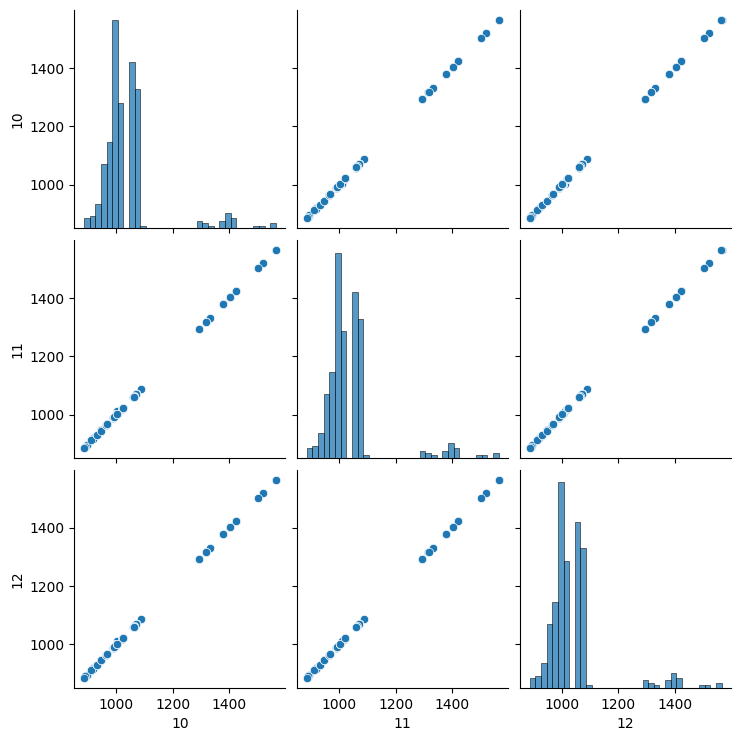

[[ 964.4  964.4  964.4]
 [1019.7 1019.7 1019.7]
 [ 988.4  988.4  988.4]
 ...
 [1061.5 1061.5 1061.5]
 [1022.6 1022.6 1022.6]
 [1022.6 1022.6 1022.6]]


<Figure size 1500x500 with 0 Axes>

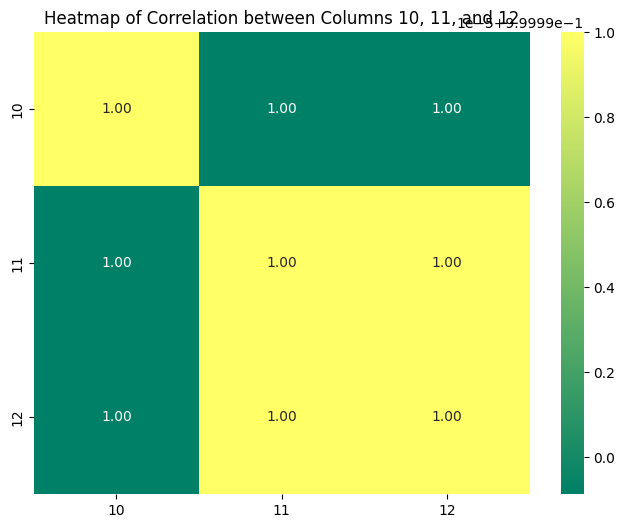

In [24]:
# Trực quan hóa mối quan hệ giữa các cột
sns.pairplot(df.iloc[:, [10, 11, 12]])
plt.show()


columns_of_interest = ['10', '11', '12']
X = df[columns_of_interest].values
print(X)


plt.figure(figsize=(15, 5))

#Biểu đồ heatmap
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt='.2f')
plt.title('Heatmap of Correlation between Columns 10, 11, and 12')
plt.show()

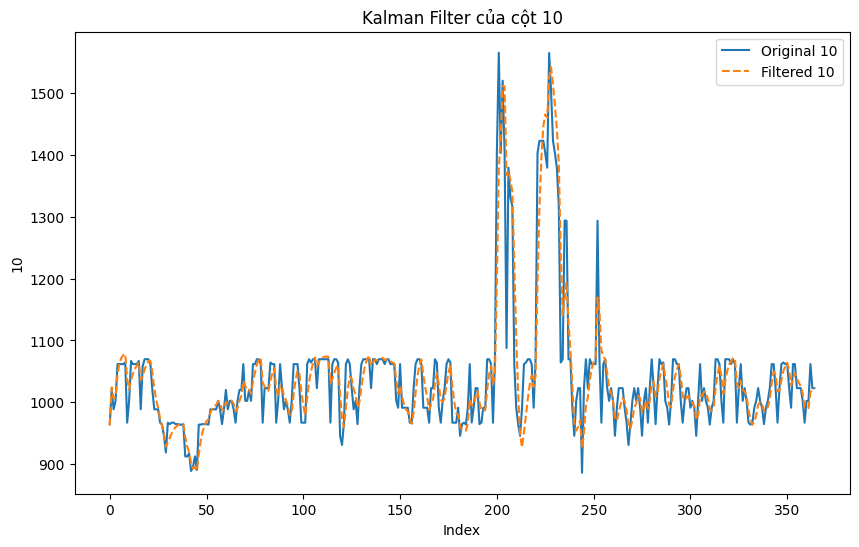

In [10]:
from filterpy.kalman import KalmanFilter
import numpy as np

# Function to apply Kalman Filter
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])      
    kf.F = np.array([[1., 1.], [0., 1.]]) 
    kf.H = np.array([[1., 0.]])     
    kf.P *= 1000.                   
    kf.R = 5                       
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) 

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

# Áp dụng Kalman Filter cho cột thứ 10 (Feature_10)
filtered_feature_10 = apply_kalman_filter(X[:, 0])

# So sánh dữ liệu gốc và dữ liệu đã lọc
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], label='Original ' + df.columns[10])
plt.plot(filtered_feature_10, label='Filtered ' + df.columns[10], linestyle='dashed')
plt.title('Kalman Filter của cột ' + df.columns[10])
plt.xlabel('Index')
plt.ylabel(df.columns[10])
plt.legend()
plt.show()

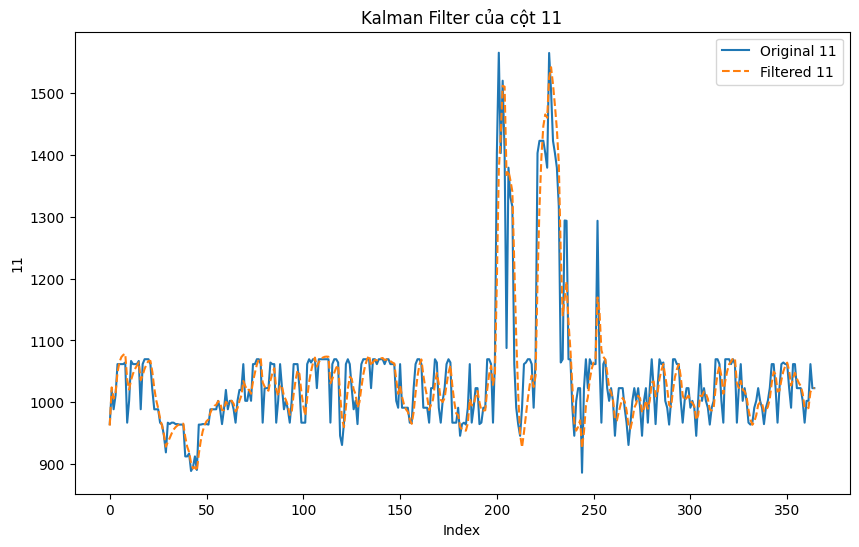

In [11]:

def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])      
    kf.F = np.array([[1., 1.], [0., 1.]])
    kf.H = np.array([[1., 0.]])   
    kf.P *= 1000.                  
    kf.R = 5                      
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) 

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data
filtered_feature_11 = apply_kalman_filter(X[:, 2])
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], label='Original ' + df.columns[11])
plt.plot(filtered_feature_11, label='Filtered ' + df.columns[11], linestyle='dashed')
plt.title('Kalman Filter của cột ' + df.columns[11])
plt.xlabel('Index')
plt.ylabel(df.columns[11])
plt.legend()
plt.show()

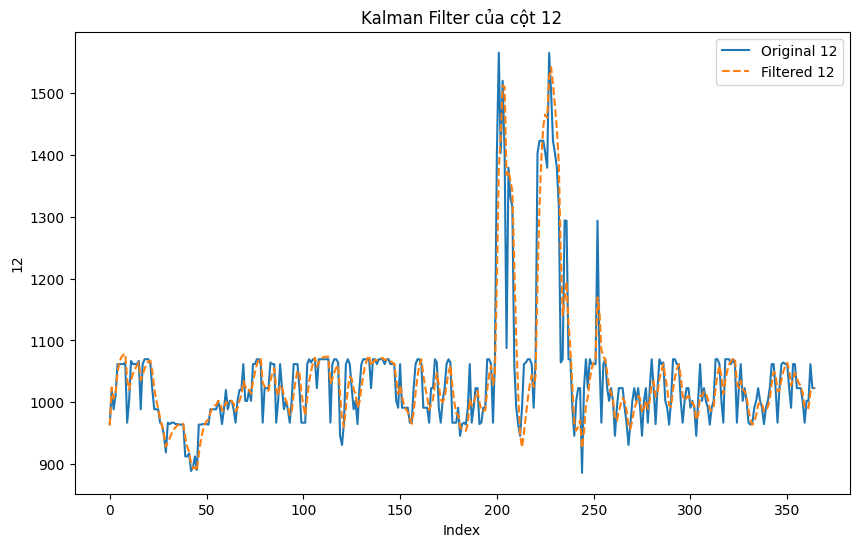

In [12]:

def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])    
    kf.F = np.array([[1., 1.], [0., 1.]]) 
    kf.H = np.array([[1., 0.]])     
    kf.P *= 1000.                 
    kf.R = 5                     
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) 

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

filtered_feature_12 = apply_kalman_filter(X[:, 2])

plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], label='Original ' + df.columns[12])
plt.plot(filtered_feature_12, label='Filtered ' + df.columns[12], linestyle='dashed')
plt.title('Kalman Filter của cột ' + df.columns[12])
plt.xlabel('Index')
plt.ylabel(df.columns[12])
plt.legend()
plt.show()

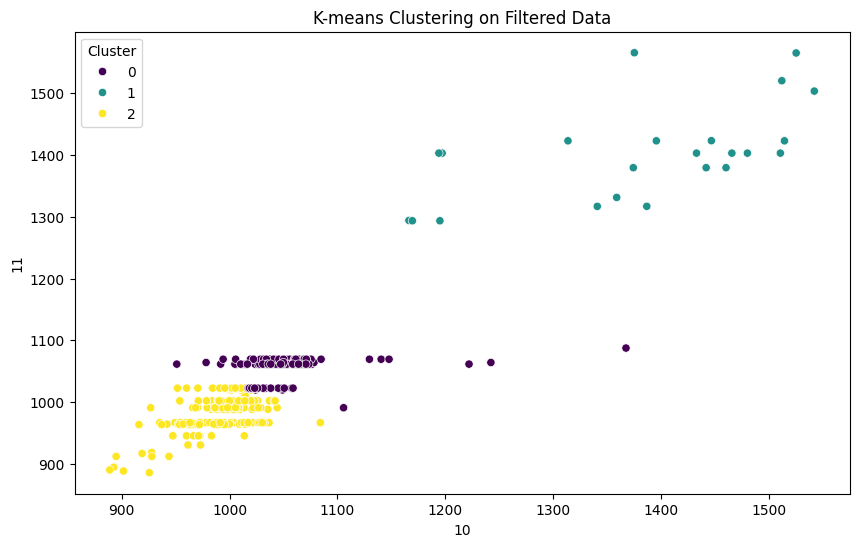

In [15]:
from sklearn.cluster import KMeans

# Tạo một DataFrame mới với cột 10, cột 11 đã được lọc, và cột 12
df_filtered = pd.DataFrame({
    df.columns[10]: X[:, 0],
    df.columns[11]: filtered_feature_11,
    df.columns[12]: X[:, 2]
})

# Sử dụng k-means clustering với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

# Trực quan hóa kết quả cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered[df.columns[11]], y=df_filtered[df.columns[12]], hue=df_filtered['Cluster'], palette='viridis')
plt.title('K-means Clustering on Filtered Data')
plt.xlabel(df.columns[10])
plt.ylabel(df.columns[11])
plt.show()